# data analysis from 10/6/2022

See Creating_AverageIVIMCurves.m for the code done to produce the data in the excel sheet

See 20221008SummaryOfResults.docx for summary of the process and results here. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv
import scipy.optimize as op
import scipy.stats as stats
from scipy.optimize import curve_fit
import scipy.io 
from scipy.stats import rice
from mpl_toolkits.mplot3d import Axes3D

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr
from scipy.special import stdtr
import csv
import pandas as pd

import sys 
import os
sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code/"))
from Data20200706 import *

In [2]:
excelsheet = '/Users/neuroimaging/Desktop/MR-Code/Dissertation_Code/AverageIVIMCurves.xlsx'
Data = np.array(np.transpose(pd.read_excel(excelsheet, sheet_name = 'IVIMCurves',header = None)))



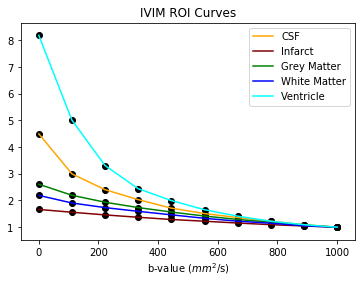

In [3]:
CSF = Data[0]
Infarct = Data[1]
GM = Data[2]
WM = Data[3]
Ventricle = Data[4]
Bvals = [0, 111, 222, 333, 444, 556, 667, 778, 889, 1000]

pl.plot(Bvals,CSF/CSF[-1],color = 'orange',label = 'CSF')
pl.scatter(Bvals,CSF/CSF[-1],color = 'black')
pl.plot(Bvals,Infarct/Infarct[-1],color = 'maroon',label = 'Infarct')
pl.scatter(Bvals,Infarct/Infarct[-1],color = 'black')
pl.plot(Bvals,GM/GM[-1],color = 'green',label = 'Grey Matter')
pl.scatter(Bvals,GM/GM[-1],color = 'black')
pl.plot(Bvals,WM/WM[-1],color = 'blue',label = 'White Matter')
pl.scatter(Bvals,WM/WM[-1],color = 'black')
pl.plot(Bvals,Ventricle/Ventricle[-1],color = 'cyan',label = 'Ventricle')
pl.scatter(Bvals,Ventricle/Ventricle[-1],color = 'black')
pl.legend()
pl.xlabel('b-value ($mm^2$/s)')

pl.title('IVIM ROI Curves')
pl.savefig('/Users/neuroimaging/Desktop/IVIMCurves.tif',dpi = 200)

pl.show()


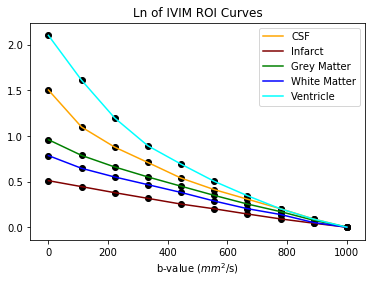

infarct has no perfusion
gm and wm show change around 0 - 200
csf shows potential tri-exp


In [4]:
pl.plot(Bvals,np.log(CSF/CSF[-1]),color = 'orange',label = 'CSF')
pl.scatter(Bvals,np.log(CSF/CSF[-1]),color = 'black')
pl.plot(Bvals,np.log(Infarct/Infarct[-1]),color = 'maroon',label = 'Infarct')
pl.scatter(Bvals,np.log(Infarct/Infarct[-1]),color = 'black')
pl.plot(Bvals,np.log(GM/GM[-1]),color = 'green',label = 'Grey Matter')
pl.scatter(Bvals,np.log(GM/GM[-1]),color = 'black')
pl.plot(Bvals,np.log(WM/WM[-1]),color = 'blue',label = 'White Matter')
pl.scatter(Bvals,np.log(WM/WM[-1]),color = 'black')
pl.plot(Bvals,np.log(Ventricle/Ventricle[-1]),color = 'cyan',label = 'Ventricle')
pl.scatter(Bvals,np.log(Ventricle/Ventricle[-1]),color = 'black')
pl.legend()
pl.title('Ln of IVIM ROI Curves')
pl.xlabel('b-value ($mm^2$/s)')
pl.savefig('/Users/neuroimaging/Desktop/LnCurves.tif',dpi = 200)

pl.show()

print('infarct has no perfusion\ngm and wm show change around 0 - 200\ncsf shows potential tri-exp')

# now trying fit to these equations

In [8]:
def expfunc(b,A,D):
    return A*np.exp(-b*D)
def biexpfunc(b,f,D,Ds):
    return (1-f)*np.exp(-b*D) + f*np.exp(-b*Ds)
def triexpfunc(b,alph,beta,gamm,D,Ds,Dcsf):
    return alph*np.exp(-b*D) + beta*np.exp(-b*Ds) + gamm*np.exp(-b*Dcsf)

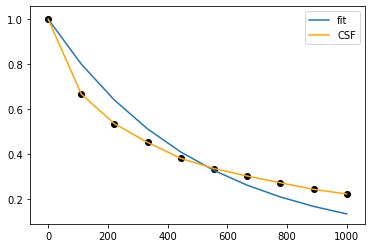

CSF: f, D, Ds
1.0788513675300202 0.0020120962617516057 0.0020119773133400617


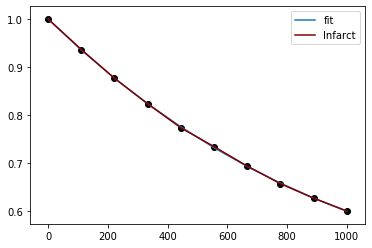

Infarct:  f, D, Ds
0.09925419460214523 0.0007316730565661694 -0.0005200011358501202


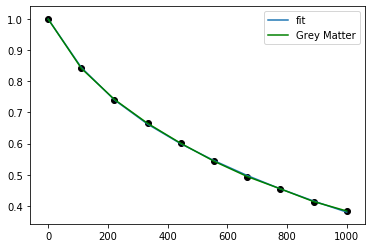

Grey Matter:  f, D, Ds
0.1534623747450445 0.000802102841417883 0.007092013544351539


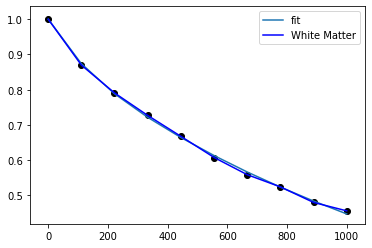

White Matter: f, D, Ds
0.09354877265947453 0.0007059664761381542 0.008714601077670811


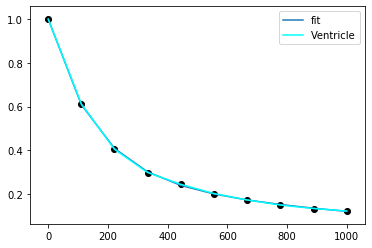

Ventricles: f, D, Ds
0.3120922449620339 0.006677284162690219 0.0009591259505169021


In [9]:
Bvals = np.array(Bvals)
#  CSF
p0 = [1,.001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,CSF/CSF[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label= 'fit')
pl.plot(Bvals,CSF/CSF[0],color = 'orange',label = 'CSF')
pl.scatter(Bvals,CSF/CSF[0],color = 'black')
pl.legend()
pl.show()
print('CSF: f, D, Ds')
print(*popt)


#  Infarct
p0 = [1,.001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,Infarct/Infarct[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label = 'fit')
pl.plot(Bvals,Infarct/Infarct[0],color = 'maroon',label = 'Infarct')
pl.scatter(Bvals,Infarct/Infarct[0],color = 'black')
pl.legend()
pl.show()
print('Infarct:  f, D, Ds')
print(*popt)

#  GM
p0 = [1,.0001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,GM/GM[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label = 'fit')
pl.plot(Bvals,GM/GM[0],color = 'green',label = 'Grey Matter')
pl.scatter(Bvals,GM/GM[0],color = 'black')
pl.legend()
pl.show()
print('Grey Matter:  f, D, Ds')
print(*popt)

#  WM
p0 = [1,.0001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,WM/WM[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label = 'fit')
pl.plot(Bvals,WM/WM[0],color = 'blue',label = 'White Matter')
pl.scatter(Bvals,WM/WM[0],color = 'black')
pl.legend()
pl.show()
print('White Matter: f, D, Ds')
print(*popt)


#  Ventricle
p0 = [1,.0001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,Ventricle/Ventricle[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label = 'fit')
pl.plot(Bvals,Ventricle/Ventricle[0],color = 'cyan',label = 'Ventricle')
pl.scatter(Bvals,Ventricle/Ventricle[0],color = 'black')
pl.legend()
pl.show()
print('Ventricles: f, D, Ds')
print(*popt)

# comparing Infarct w mono-exp

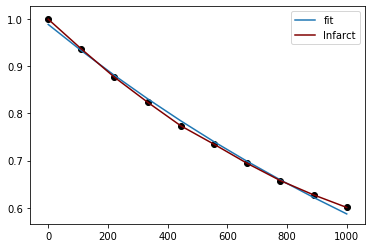

Infarct:  f, D
0.9888683684864717 0.0005217402718295402


In [38]:
#  Infarct
p0 = [1,.001]
popt,pcov = curve_fit(expfunc,Bvals,Infarct/Infarct[0],p0,bounds = (0,np.inf))
pl.plot(Bvals,expfunc(Bvals,*popt),label = 'fit')
pl.plot(Bvals,Infarct/Infarct[0],color = 'maroon',label = 'Infarct')
pl.scatter(Bvals,Infarct/Infarct[0],color = 'black')
pl.legend()
pl.show()
print('Infarct:  f, D')
print(*popt)

# Comparing CSF w mono-exp, bi-exp, and tri-exp

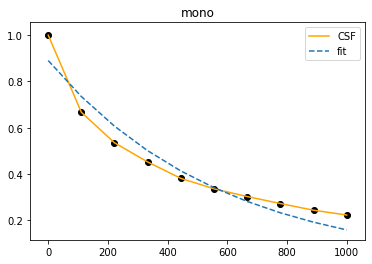

CSF: f, D
0.8902837854190304 0.0017290523906960495


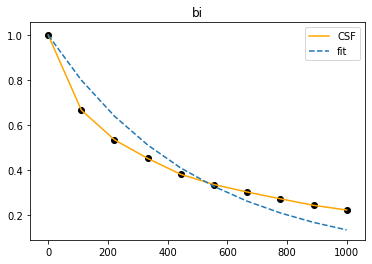

CSF: f, D, Ds
1.0788513675300202 0.0020120962617516057 0.0020119773133400617


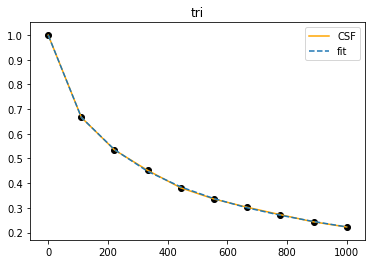

CSF: a,b,c, D1, D2, D3
0.38811260320958263 0.4659023873244419 0.1459855105527247 0.0045285616815025935 0.000757416493447454 0.033957865700035325


In [41]:
#  CSF
p0 = [1,.001]
popt,pcov = curve_fit(expfunc,Bvals,CSF/CSF[0],p0)
pl.plot(Bvals,CSF/CSF[0],color = 'orange',label = 'CSF')
pl.plot(Bvals,expfunc(Bvals,*popt),label= 'fit',linestyle = '--')
pl.scatter(Bvals,CSF/CSF[0],color = 'black')
pl.title('mono')
pl.legend()
pl.show()
print('CSF: f, D')
print(*popt)

#  CSF
p0 = [1,.001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,CSF/CSF[0],p0)
pl.plot(Bvals,CSF/CSF[0],color = 'orange',label = 'CSF')
pl.plot(Bvals,biexpfunc(Bvals,*popt),label= 'fit',linestyle = '--')
pl.scatter(Bvals,CSF/CSF[0],color = 'black')
pl.title('bi')
pl.legend()
pl.show()
print('CSF: f, D, Ds')
print(*popt)

#  CSF
p0 = [.3,.3,.3,.001,.001,.001]
popt,pcov = curve_fit(triexpfunc,Bvals,CSF/CSF[0],p0)
pl.plot(Bvals,CSF/CSF[0],color = 'orange',label = 'CSF')
pl.plot(Bvals,triexpfunc(Bvals,*popt),label= 'fit',linestyle = '--')
pl.scatter(Bvals,CSF/CSF[0],color = 'black')
pl.title('tri')
pl.legend()
pl.show()
print('CSF: a,b,c, D1, D2, D3')
print(*popt)

### THis suggests tri-exponential behavior of CSF mask... 

Consider fast portion being pulsatility, slow portion being free water diffusion, middle portion unknown. intra-extra vascular exchange? or possibly contamination from mixed voxels? 


Look at middle of ventricle only. should see if it's then bi-exponential!(middle part removed)


Getting median absolute displacement:  $= .6745\sqrt{2Dt}$ with $t$ = 1

In [54]:
def MedianDisp(D):
    return .6745*np.sqrt(2*D)

print(MedianDisp(.000757))

0.026244898142305677


# pretty plot

Infarct:  f, D, Ds
1.153995340218749 0.000539426280912538 0.0005394283577457021
0.9946510241674872


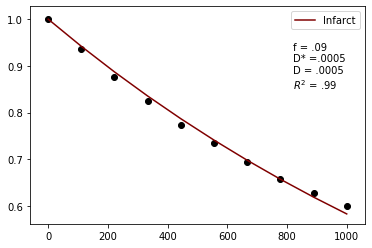

In [31]:

#  Infarct
p0 = [1,.001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,Infarct/Infarct[0],p0,bounds=(0, np.infty))
pl.plot(Bvals,biexpfunc(Bvals,*popt),color = 'maroon',label = 'Infarct')
pl.scatter(Bvals,Infarct/Infarct[0],color = 'black')
pl.legend()

print('Infarct:  f, D, Ds')
print(*popt)

y_fit = biexpfunc(Bvals,*popt)
y = Infarct/Infarct[0]
# residual sum of squares
ss_res = np.sum((y - y_fit) ** 2)
# total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)
# r-squared
r2 = 1 - (ss_res / ss_tot)
print(r2)


s ='f = .09\nD* =.0005\nD = .0005\n$R^2$ = .99'
pl.text(820,.85,s)
pl.savefig('/Users/neuroimaging/Desktop/infarct.png',dpi = 150)
pl.show()

Grey Matter:  f, D, Ds
0.1534623747450445 0.000802102841417883 0.007092013544351539
0.9998725678831601


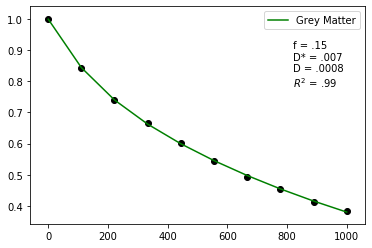

In [36]:
#  GM
p0 = [1,.0001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,GM/GM[0],p0)
#pl.plot(Bvals,GM/GM[0],color = 'green',label = 'Grey Matter')
pl.plot(Bvals,biexpfunc(Bvals,*popt),color = 'green',label = 'Grey Matter')
pl.scatter(Bvals,GM/GM[0],color = 'black')
pl.legend()

print('Grey Matter:  f, D, Ds')
print(*popt)

y_fit = biexpfunc(Bvals,*popt)
y = GM/GM[0]
# residual sum of squares
ss_res = np.sum((y - y_fit) ** 2)
# total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)
# r-squared
r2 = 1 - (ss_res / ss_tot)
print(r2)


s ='f = .15\nD* = .007\nD = .0008\n$R^2$ = .99'
pl.text(820,.78,s)
pl.savefig('/Users/neuroimaging/Desktop/GM.png',dpi = 150)
pl.show()

0.9991583988437435


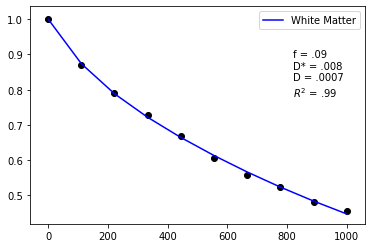

White Matter: f, D, Ds
0.09354877265947453 0.0007059664761381542 0.008714601077670811


In [43]:
#  WM
p0 = [1,.0001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,WM/WM[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label = 'White Matter',color = 'blue')
#pl.plot(Bvals,WM/WM[0],color = 'blue',label = 'White Matter')
pl.scatter(Bvals,WM/WM[0],color = 'black')
pl.legend()

y_fit = biexpfunc(Bvals,*popt)
y = WM/WM[0]
# residual sum of squares
ss_res = np.sum((y - y_fit) ** 2)
# total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)
# r-squared
r2 = 1 - (ss_res / ss_tot)
print(r2)


s ='f = .09\nD* = .008\nD = .0007\n$R^2$ = .99'
pl.text(820,.78,s)
pl.savefig('/Users/neuroimaging/Desktop/WM.png',dpi = 150)

pl.show()
print('White Matter: f, D, Ds')
print(*popt)

0.9998928989873952


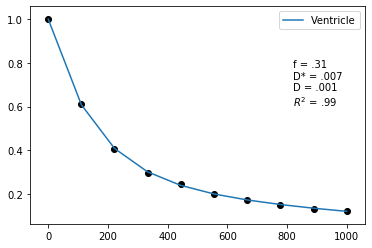

Ventricles: f, D, Ds
0.3120922449620339 0.006677284162690219 0.0009591259505169021


In [42]:
#  Ventricle
p0 = [1,.0001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,Ventricle/Ventricle[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label = 'Ventricle')
#pl.plot(Bvals,Ventricle/Ventricle[0],color = 'cyan',label = 'Ventricle')
pl.scatter(Bvals,Ventricle/Ventricle[0],color = 'black')
pl.legend()

y_fit = biexpfunc(Bvals,*popt)
y = Ventricle/Ventricle[0]
# residual sum of squares
ss_res = np.sum((y - y_fit) ** 2)
# total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)
# r-squared
r2 = 1 - (ss_res / ss_tot)
print(r2)


s ='f = .31\nD* = .007\nD = .001\n$R^2$ = .99'
pl.text(820,.6,s)
pl.savefig('/Users/neuroimaging/Desktop/Ventricle.png',dpi = 150)

pl.show()
print('Ventricles: f, D, Ds')
print(*popt)

0.9540743363767792


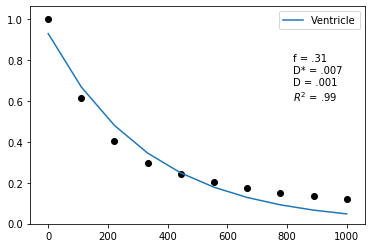

Ventricles: f, D, Ds
0.9283744859157178 0.0029755790312422335


In [46]:
#  Ventricle
p0 = [1,.003]
popt,pcov = curve_fit(expfunc,Bvals,Ventricle/Ventricle[0],p0)
pl.plot(Bvals,expfunc(Bvals,*popt),label = 'Ventricle')
#pl.plot(Bvals,Ventricle/Ventricle[0],color = 'cyan',label = 'Ventricle')
pl.scatter(Bvals,Ventricle/Ventricle[0],color = 'black')
pl.legend()

y_fit = expfunc(Bvals,*popt)
y = Ventricle/Ventricle[0]
# residual sum of squares
ss_res = np.sum((y - y_fit) ** 2)
# total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)
# r-squared
r2 = 1 - (ss_res / ss_tot)
print(r2)


s ='f = .31\nD* = .007\nD = .001\n$R^2$ = .99'
pl.text(820,.6,s)
pl.savefig('/Users/neuroimaging/Desktop/Ventricle_mono.png',dpi = 150)

pl.show()
print('Ventricles: f, D, Ds')
print(*popt)